# I] Import functions and options

In [1]:
import pandas, numpy, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt

In [2]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8), 'svg.fonttype' : 'none'})

In [3]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [4]:
path = input_file_directory + "mefs/glucose_lactate/"

# II] Glucose

In [5]:
experiments = "_exp1", "_exp2", "_exp3"
dfs_dmso_l = []
dfs_baf_l = []

for experiment in experiments:
    file_n = "glucose" + experiment + ".csv"
    df = pandas.read_csv(path + file_n, sep = ";") #download
    print(df, '\n')
    
    df = df.T #transpose
    df.reset_index(inplace=True) #reset index
    df.iloc[2:,:] = df.iloc[2:,:].apply(lambda x: x.str.replace(',','.')) #',' to '.'
    df.iloc[2:,:] = df.iloc[2:,:].astype(float)
    
    df_dmso = df.iloc[:,:4]
    df_dmso.columns = df_dmso.iloc[1]
    df_dmso = df_dmso.drop(df_dmso.index[0:2])
    df_dmso.loc['mean()'] = df_dmso.mean() #mean for technical duplicate
    df_dmso = df_dmso.loc['mean()':,:] #select the mean
    dfs_dmso_l.append(df_dmso)

    df_baf = df.iloc[:,4:]
    df_baf.columns = df_baf.iloc[1]
    df_baf = df_baf.drop(df_baf.index[0:2])
    df_baf.loc['mean()'] = df_baf.mean() #mean for technical duplicate
    df_baf = df_baf.loc['mean()':,:] #select the mean row
    dfs_baf_l.append(df_baf)

#concat the three experiments
dfs_glu_dmso = pandas.concat([dfs_dmso_l[0], dfs_dmso_l[1], dfs_dmso_l[2]], axis=0) 
dfs_glu_baf  = pandas.concat([dfs_baf_l[0], dfs_baf_l[1], dfs_baf_l[2]], axis=0)

dfs_glu_baf

   DMSO    WT  2,285627903  2,367087339
0  DMSO    EV  1,892740779  1,909989799
1  DMSO  iso1  2,137051576  2,063587002
2  DMSO  iso2  2,186799436  2,192979329
3   BAF    WT  2,137009214  2,093682721
4   BAF    EV   1,65803912  1,663249908
5   BAF  iso1  1,494734427  1,593197596
6   BAF  iso2  1,728111004  1,793055451 

   DMSO    WT   1,64650121  1,708473456
0  DMSO    EV  2,036298082  2,036298082
1  DMSO  iso1  1,290138313  1,288603043
2  DMSO  iso2  2,260724623  2,272345588
3   BAF    WT  1,636235222  1,691514548
4   BAF    EV  1,564893044  1,516080145
5   BAF  iso1  1,241719623  1,254805661
6   BAF  iso2  2,168122671          NaN 

   DMSO    WT  0,303933738  0,296900852
0  DMSO    EV  0,242214225  0,237450889
1  DMSO  iso1  0,222247933  0,213586654
2  DMSO  iso2  0,360839518  0,349306395
3   BAF    WT  0,321635021  0,309108899
4   BAF    EV  0,230721249  0,224072072
5   BAF  iso1  0,218781918  0,213971906
6   BAF  iso2  0,381481063   0,35637208 



1,WT,EV,iso1,iso2
mean(),2.11535,1.66064,1.54397,1.76058
mean(),1.66387,1.54049,1.24826,2.16812
mean(),0.315372,0.227397,0.216377,0.368927


In [6]:
#normalization on EV
dfs_glucose = dfs_glu_dmso, dfs_glu_baf
infos = "dmso", "baf"

dfs_glu_l = []

for i in range(len(dfs_glucose)):
    df = dfs_glucose[i]
    info = infos[i]
    
    print(info.upper())
    df = df.assign(MEF_WT = df['WT'] / df['EV'],
                   ATG7ko = df['EV'] / df['EV'],
                   atg7_1 = df['iso1'] / df['EV'],
                   atg7_2 = df['iso2'] / df['EV'])

    df.reset_index(drop=True, inplace=True)
    print(df, '\n')

    df = df.iloc[:,4:]
    df = df.rename(columns = {'MEF_WT':'MEF WT',
                              'ATG7ko':'ATG7-/-',
                              'atg7_1':'ATG7(1)',      
                              'atg7_2':'ATG7(2)'})
    dfs_glu_l.append(df)
df

DMSO
1        WT        EV      iso1      iso2    MEF_WT ATG7ko    atg7_1   atg7_2
0   2.32636   1.90137   2.10032   2.18989   1.22352      1   1.10464  1.15175
1   1.67749    2.0363   1.28937   2.26654  0.823793      1  0.633193  1.11307
2  0.300417  0.239833  0.217917  0.355073   1.25261      1  0.908623   1.4805 

BAF
1        WT        EV      iso1      iso2   MEF_WT ATG7ko    atg7_1   atg7_2
0   2.11535   1.66064   1.54397   1.76058  1.27381      1  0.929739  1.06018
1   1.66387   1.54049   1.24826   2.16812   1.0801      1  0.810304  1.40743
2  0.315372  0.227397  0.216377  0.368927  1.38688      1   0.95154  1.62239 



1,MEF WT,ATG7-/-,ATG7(1),ATG7(2)
0,1.27381,1,0.929739,1.06018
1,1.0801,1,0.810304,1.40743
2,1.38688,1,0.95154,1.62239



       cells     value        x
0    MEF WT  1.223520  Glucose
1    MEF WT  0.823793  Glucose
2    MEF WT  1.252613  Glucose
3   ATG7-/-  1.000000  Glucose
4   ATG7-/-  1.000000  Glucose
5   ATG7-/-  1.000000  Glucose
6   ATG7(1)  1.104637  Glucose
7   ATG7(1)  0.633193  Glucose
8   ATG7(1)  0.908623  Glucose
9   ATG7(2)  1.151746  Glucose
10  ATG7(2)  1.113066  Glucose
11  ATG7(2)  1.480504  Glucose

       cells     value        x
0    MEF WT  1.273810  Glucose
1    MEF WT  1.080097  Glucose
2    MEF WT  1.386880  Glucose
3   ATG7-/-  1.000000  Glucose
4   ATG7-/-  1.000000  Glucose
5   ATG7-/-  1.000000  Glucose
6   ATG7(1)  0.929739  Glucose
7   ATG7(1)  0.810304  Glucose
8   ATG7(1)  0.951540  Glucose
9   ATG7(2)  1.060181  Glucose
10  ATG7(2)  1.407427  Glucose
11  ATG7(2)  1.622392  Glucose


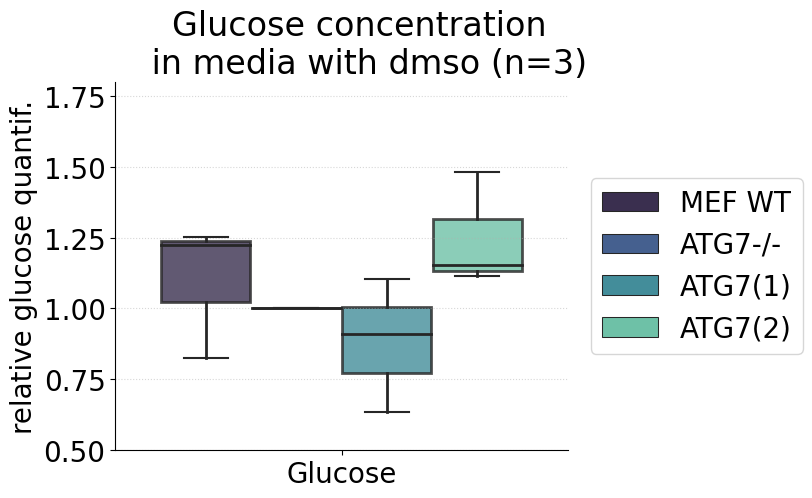

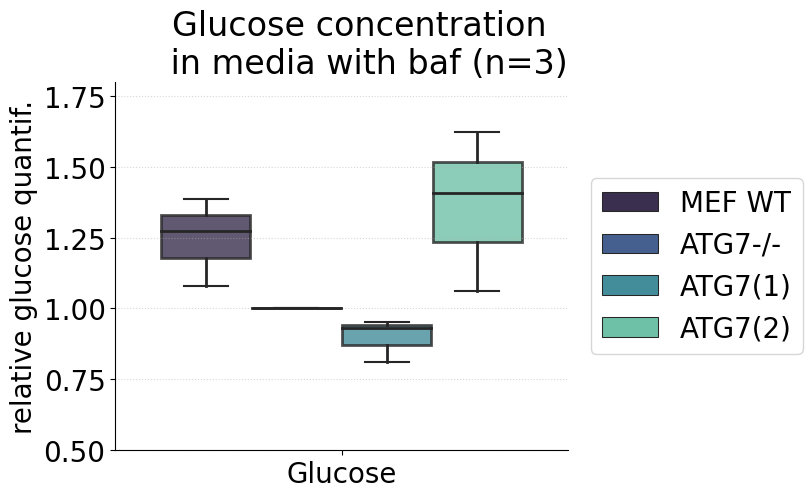

In [16]:
infos = 'dmso', 'baf'

for i in range(len(dfs_glu_l)) :
    df = dfs_glu_l[i]
    info = infos[i]
    
    df = df.melt(var_name="cells") #convert wide to long df   
    df['value'] = df['value'].astype(float)
    df['x'] = 'Glucose'
    print('\n', df)
    
    #graph
    seaborn.catplot(x="x", y="value", hue="cells", aspect= 1.2, kind="box", palette = 'mako',
                    data = df, boxprops={'lw':2, 'alpha' : 0.8}, medianprops={'lw':2}, whiskerprops={'lw':2}, 
                    showcaps=True, showfliers=False, legend=False)

    plt.tight_layout()
    plt.ylabel('relative glucose quantif.')
    plt.ylim(0.5, 1.8)
    plt.xlabel('')
    plt.title('Glucose concentration \n in media with '+ info + ' (n=3)', x=.55)
    plt.legend(loc='center right', fontsize=20, bbox_to_anchor=(1.55, 0.5))  

# I] Lactate

In [8]:
experiments = "_exp1", "_exp2", "_exp3"
dfs_dmso_l = []
dfs_baf_l = []

for experiment in experiments:
    file_n = "lactate" + experiment + ".csv"
    df = pandas.read_csv(path + file_n, sep = ";") #download
    print(df, '\n')
    
    df = df.T #transpose
    df.reset_index(inplace=True) #reset index
    df.iloc[2:,:] = df.iloc[2:,:].apply(lambda x: x.str.replace(',','.')) #',' to '.'
    df.iloc[2:,:] = df.iloc[2:,:].astype(float)
    
    df_dmso = df.iloc[:,:4]
    df_dmso.columns = df_dmso.iloc[1]
    df_dmso = df_dmso.drop(df_dmso.index[0:2])
    df_dmso.loc['mean()'] = df_dmso.mean() #mean for technical duplicate
    df_dmso = df_dmso.loc['mean()':,:] #select the mean
    dfs_dmso_l.append(df_dmso)

    df_baf = df.iloc[:,4:]
    df_baf.columns = df_baf.iloc[1]
    df_baf = df_baf.drop(df_baf.index[0:2])
    df_baf.loc['mean()'] = df_baf.mean() #mean for technical duplicate
    df_baf = df_baf.loc['mean()':,:] #select the mean row
    dfs_baf_l.append(df_baf)

#concat the three experiments
dfs_lact_dmso = pandas.concat([dfs_dmso_l[0], dfs_dmso_l[1], dfs_dmso_l[2]], axis=0) 
dfs_lact_baf  = pandas.concat([dfs_baf_l[0], dfs_baf_l[1], dfs_baf_l[2]], axis=0)

dfs_lact_dmso

   DMSO    WT  2,975465182   2,90957878  2,915748744
0  DMSO    EV  2,361937633  2,423438021          NaN
1  DMSO  iso1  2,678644617  2,689600219          NaN
2  DMSO  iso2  2,941954624  2,898666563  2,918064515
3   BAF    WT  2,631933543  2,676204588          NaN
4   BAF    EV  2,108213649  2,049431856  2,068559265
5   BAF  iso1  1,944974047  1,972448752          NaN
6   BAF  iso2  2,429189892  2,385957393          NaN 

   DMSO    WT  1,869402047  1,889384144
0  DMSO    EV   2,28700129  2,289585472
1  DMSO  iso1  1,476567498  1,452776711
2  DMSO  iso2  2,887694808  2,720433041
3   BAF    WT  1,937300488  1,898147776
4   BAF    EV  1,773681215  1,781394701
5   BAF  iso1  1,421837538  1,452103711
6   BAF  iso2  2,777117441  2,696993325 

   DMSO    WT  0,228975166  0,225104245
0  DMSO    EV  0,172311847  0,175200642
1  DMSO  iso1  0,157488409  0,159071207
2  DMSO  iso2  0,283530162  0,280913178
3   BAF    WT  0,237137389  0,224779176
4   BAF    EV  0,166664217  0,164553027
5   BAF  iso

1,WT,EV,iso1,iso2
mean(),2.9336,2.39269,2.68412,2.91956
mean(),1.87939,2.28829,1.46467,2.80406
mean(),0.22704,0.173756,0.15828,0.282222


In [9]:
#normalization on EV
dfs_lactate = dfs_lact_dmso, dfs_lact_baf
infos = "dmso", "baf"

dfs_lact_l = []

for i in range(len(dfs_lactate)):
    df = dfs_lactate[i]
    info = infos[i]
    
    print()
    df = df.assign(MEF_WT = df['WT'] / df['EV'],
                   ATG7ko = df['EV'] / df['EV'],
                   atg7_1 = df['iso1'] / df['EV'],
                   atg7_2 = df['iso2'] / df['EV'])

    df.reset_index(drop=True, inplace=True)
    print(df, '\n')

    df = df.iloc[:,4:]
    df = df.rename(columns = {'MEF_WT':'MEF WT',
                              'ATG7ko':'ATG7-/-',
                              'atg7_1':'ATG7(1)',      
                              'atg7_2':'ATG7(2)'})
    dfs_lact_l.append(df)
    
df


1       WT        EV     iso1      iso2    MEF_WT ATG7ko    atg7_1   atg7_2
0   2.9336   2.39269  2.68412   2.91956   1.22607      1    1.1218   1.2202
1  1.87939   2.28829  1.46467   2.80406  0.821308      1  0.640072   1.2254
2  0.22704  0.173756  0.15828  0.282222   1.30666      1   0.91093  1.62424 


1        WT        EV      iso1     iso2   MEF_WT ATG7ko    atg7_1   atg7_2
0   2.65407    2.0754   1.95871  2.40757  1.27882      1  0.943775  1.16005
1   1.91772   1.77754   1.43697  2.73706  1.07887      1  0.808405   1.5398
2  0.230958  0.165609  0.157755  0.29401   1.3946      1  0.952579  1.77533 



1,MEF WT,ATG7-/-,ATG7(1),ATG7(2)
0,1.27882,1,0.943775,1.16005
1,1.07887,1,0.808405,1.5398
2,1.3946,1,0.952579,1.77533



       cells     value        x
0    MEF WT  1.226068  Lactate
1    MEF WT  0.821308  Lactate
2    MEF WT  1.306656  Lactate
3   ATG7-/-  1.000000  Lactate
4   ATG7-/-  1.000000  Lactate
5   ATG7-/-  1.000000  Lactate
6   ATG7(1)  1.121802  Lactate
7   ATG7(1)  0.640072  Lactate
8   ATG7(1)  0.910930  Lactate
9   ATG7(2)  1.220202  Lactate
10  ATG7(2)  1.225395  Lactate
11  ATG7(2)  1.624239  Lactate

       cells     value        x
0    MEF WT  1.278822  Lactate
1    MEF WT  1.078865  Lactate
2    MEF WT  1.394603  Lactate
3   ATG7-/-  1.000000  Lactate
4   ATG7-/-  1.000000  Lactate
5   ATG7-/-  1.000000  Lactate
6   ATG7(1)  0.943775  Lactate
7   ATG7(1)  0.808405  Lactate
8   ATG7(1)  0.952579  Lactate
9   ATG7(2)  1.160052  Lactate
10  ATG7(2)  1.539801  Lactate
11  ATG7(2)  1.775328  Lactate


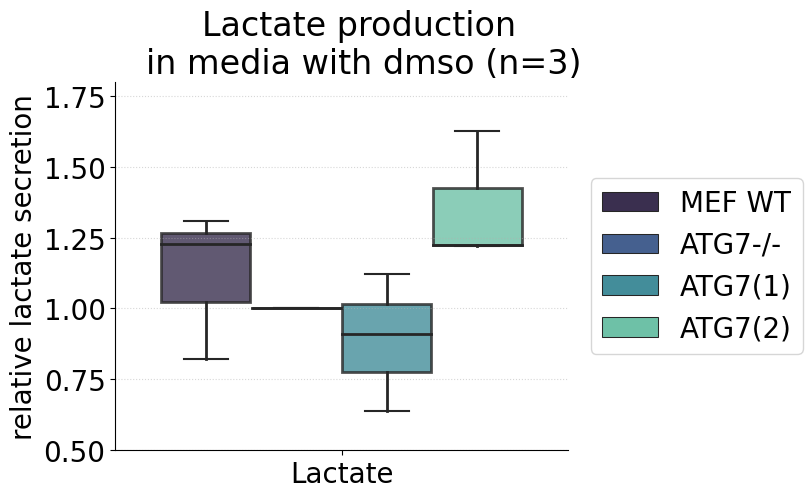

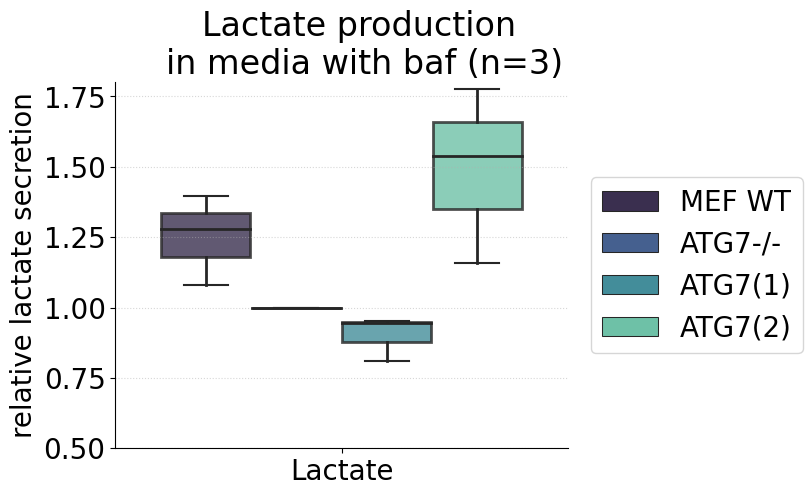

In [15]:
infos = 'dmso', 'baf'

for i in range(len(dfs_lact_l)) :
    df = dfs_lact_l[i]
    info = infos[i]
    
    df = df.melt(var_name="cells") #convert wide to long df   
    df['value'] = df['value'].astype(float)
    df['x'] = 'Lactate'
    print('\n', df)
    
    #graph
    seaborn.catplot(x="x", y="value", hue="cells", aspect= 1.2, kind="box", palette = 'mako',
                    data = df, boxprops={'lw':2, 'alpha' : 0.8}, medianprops={'lw':2}, whiskerprops={'lw':2}, 
                    showcaps=True, showfliers=False, legend=False)

    plt.tight_layout()
    plt.ylabel('relative lactate secretion')
    plt.ylim(0.5, 1.8)
    plt.xlabel('')
    plt.title('Lactate production \nin media with '+ info + ' (n=3)', x=.55)
    plt.legend(loc='center right', fontsize=20, bbox_to_anchor=(1.55, 0.5))   